In [38]:
import string
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Bidirectional, Dense, Embedding
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import sequence
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
import numpy as np

In [39]:
dataset = pd.read_csv('./data/sentiment_train.csv')
dataset.head()

,sentence,label
0,Ok brokeback mountain is such a horrible movie.,0
1,Brokeback Mountain was so awesome.,1
2,friday hung out with kelsie and we went and sa...,0
3,I am going to start reading the Harry Potter s...,1
4,"Is it just me, or does Harry Potter suck?...",0


In [40]:
def split(s):
    for punc in string.punctuation:
        s = s.replace(punc, ' ')
    return s.split()

dataset['tokens'] = dataset['sentence'].apply(split)
dataset['length'] = dataset['sentence'].apply(len)
dataset

,sentence,label,tokens,length
0,Ok brokeback mountain is such a horrible movie.,0,"[Ok, brokeback, mountain, is, such, a, horribl...",47
1,Brokeback Mountain was so awesome.,1,"[Brokeback, Mountain, was, so, awesome]",34
2,friday hung out with kelsie and we went and sa...,0,"[friday, hung, out, with, kelsie, and, we, wen...",77
3,I am going to start reading the Harry Potter s...,1,"[I, am, going, to, start, reading, the, Harry,...",92
4,"Is it just me, or does Harry Potter suck?...",0,"[Is, it, just, me, or, does, Harry, Potter, suck]",44
...,...,...,...,...
5663,Brokeback Mountain was so awesome.,1,"[Brokeback, Mountain, was, so, awesome]",34
5664,The Da Vinci Code was absolutely AWESOME!,1,"[The, Da, Vinci, Code, was, absolutely, AWESOME]",41
5665,"Oh, and Brokeback Mountain was a terrible movie.",0,"[Oh, and, Brokeback, Mountain, was, a, terribl...",48
5666,Combining the opinion / review from Gary and G...,0,"[Combining, the, opinion, review, from, Gary, ...",78


In [41]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(dataset['sentence'])
tokenizer.word_index

{'i': 1,
 'the': 2,
 'and': 3,
 'potter': 4,
 'harry': 5,
 'vinci': 6,
 'da': 7,
 'code': 8,
 'brokeback': 9,
 'mountain': 10,
 'love': 11,
 'is': 12,
 'a': 13,
 'was': 14,
 'awesome': 15,
 'mission': 16,
 'impossible': 17,
 'like': 18,
 'to': 19,
 'movie': 20,
 'it': 21,
 'that': 22,
 'because': 23,
 'sucks': 24,
 'sucked': 25,
 'hate': 26,
 'so': 27,
 'much': 28,
 'as': 29,
 'my': 30,
 'of': 31,
 'really': 32,
 'stupid': 33,
 'movies': 34,
 'you': 35,
 'down': 36,
 'be': 37,
 'with': 38,
 'just': 39,
 'but': 40,
 'one': 41,
 'know': 42,
 '3': 43,
 'out': 44,
 'suck': 45,
 'or': 46,
 'want': 47,
 'am': 48,
 'into': 49,
 'which': 50,
 'loved': 51,
 'right': 52,
 'for': 53,
 'an': 54,
 'we': 55,
 'this': 56,
 'think': 57,
 'are': 58,
 'me': 59,
 'how': 60,
 'if': 61,
 'not': 62,
 'depressing': 63,
 "it's": 64,
 'reading': 65,
 'who': 66,
 'people': 67,
 'would': 68,
 '2': 69,
 'series': 70,
 'terrible': 71,
 'only': 72,
 'his': 73,
 'horrible': 74,
 'why': 75,
 'oh': 76,
 'fucking': 77,

In [42]:
def tokenize_sentence(tokens):
    n = []
    for i in tokens:
        try:
            n.append(tokenizer.word_index[i.lower()])
        except:
            n.append(0)

    return n

tokenize_sentence(dataset['tokens'][0])

[87, 9, 10, 12, 143, 13, 74, 20]

In [43]:
dataset['tokens'] = dataset['tokens'].apply(tokenize_sentence)
dataset

,sentence,label,tokens,length
0,Ok brokeback mountain is such a horrible movie.,0,"[87, 9, 10, 12, 143, 13, 74, 20]",47
1,Brokeback Mountain was so awesome.,1,"[9, 10, 14, 27, 15]",34
2,friday hung out with kelsie and we went and sa...,0,"[129, 146, 44, 38, 147, 3, 55, 93, 3, 97, 2, 7...",77
3,I am going to start reading the Harry Potter s...,1,"[1, 48, 111, 19, 81, 65, 2, 5, 4, 70, 134, 23,...",92
4,"Is it just me, or does Harry Potter suck?...",0,"[12, 21, 39, 59, 46, 162, 5, 4, 45]",44
...,...,...,...,...
5663,Brokeback Mountain was so awesome.,1,"[9, 10, 14, 27, 15]",34
5664,The Da Vinci Code was absolutely AWESOME!,1,"[2, 7, 6, 8, 14, 121, 15]",41
5665,"Oh, and Brokeback Mountain was a terrible movie.",0,"[76, 3, 9, 10, 14, 13, 71, 20]",48
5666,Combining the opinion / review from Gary and G...,0,"[240, 2, 170, 220, 110, 241, 3, 242, 243, 2, 7...",78


In [44]:
tokenized_sequences = sequence.pad_sequences(dataset['tokens'], padding='post')
tokenized_sequences

array([[ 87,   9,  10, ...,   0,   0,   0],
       [  9,  10,  14, ...,   0,   0,   0],
       [129, 146,  44, ...,   0,   0,   0],
       ...,
       [ 76,   3,   9, ...,   0,   0,   0],
       [240,   2, 170, ...,   0,   0,   0],
       [  9,  10,  14, ...,   0,   0,   0]], dtype=int32)

In [45]:
datalabels = dataset['label'].to_numpy()
datalabels

array([0, 1, 0, ..., 0, 0, 0])

In [46]:
length = tokenized_sequences.shape[1]
length

40

In [47]:
x_train, x_test, y_train, y_test = train_test_split(tokenized_sequences, datalabels, test_size=0.1, random_state=0)
len(x_train), len(x_test)

(5101, 567)

In [48]:
bi_lstm_model = Sequential(name="Bidirectional_LSTM")
bi_lstm_model.add(Embedding(len(tokenizer.index_word) + 1,
                            32,
                            input_length=length))
bi_lstm_model.add(Bidirectional(LSTM(128,
                                     activation='tanh',
                                     return_sequences=False)))
bi_lstm_model.add(Dense(1, activation='sigmoid'))
 
# Printing model summary
print(bi_lstm_model.summary())
 
# Compiling model summary
bi_lstm_model.compile(
  loss="binary_crossentropy",
  optimizer='adam',
  metrics=['accuracy']
)
 
# Training the model
history = bi_lstm_model.fit(x_train, y_train,
                             batch_size=64,
                             epochs=5,
                             verbose=2,
                             validation_data=(x_test, y_test))
 
# Printing model score on test data
print()
print("Bidirectional LSTM model Score---> ",
      bi_lstm_model.evaluate(x_test, y_test, verbose=0))

Model: "Bidirectional_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 40, 32)            63456     
                                                                 
 bidirectional_4 (Bidirecti  (None, 256)               164864    
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 228577 (892.88 KB)
Trainable params: 228577 (892.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/5
80/80 - 27s - loss: 0.4349 - accuracy: 0.7895 - val_loss: 0.1269 - val_accuracy: 0.9541 - 27s/epoch - 340ms/step
Epoch 2/5
80/80 - 13s - loss: 0.0759 - accuracy: 0.9761 - val_loss: 0.0770 - v

In [49]:
predictions = np.round(bi_lstm_model.predict(x_test)).astype(int)
predictions

18/18 [==============================] - 2s 50ms/step


array([[0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
    

In [65]:
confusion_matrix(y_test, predictions)

array([[222,   9],
       [  1, 335]])

<Axes: >

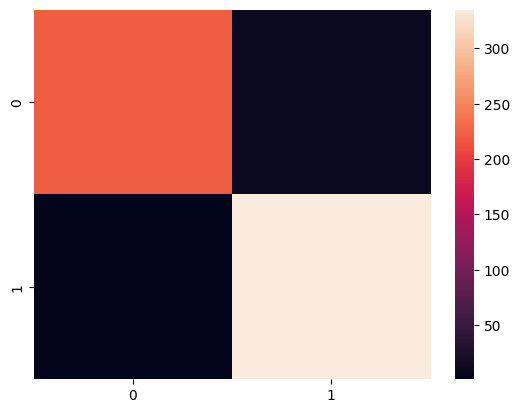

In [50]:
sns.heatmap(confusion_matrix(y_test, predictions))

In [63]:
example = "I am Harry Potter"
tokenized = [tokenize_sentence(split(example))]
tokenized = sequence.pad_sequences(tokenized, padding='post', maxlen=40)
tokenized

array([[ 1, 48,  5,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0]], dtype=int32)

In [64]:
bi_lstm_model.predict(tokenized)

1/1 [==============================] - 0s 40ms/step


array([[0.6926755]], dtype=float32)